# Statistical Analysis
- Spearman Correlation
- Heatmap Visualization

> **Note:**  
> Use the DATA TEMPLATES below to run the codes


In [174]:
# DATA_FILE = "raw_data/APP_Pillai.csv"
# OUTCOME_COLUMNS = ["Aβ40 (relative to WT)", "Aβ42 (relative to WT)", "Aβ42/40", "Amount of Ab40", "Ab42/Ab40 ratio"]
# HEATMAP_TITLE = "Spearman's Correlation Heatmap — APP Pillai et al."
# OUTPUT_PREFIX = "APP_Pillai"

In [175]:
# DATA_FILE = "raw_data/PSEN2_Pillai.csv"
# OUTCOME_COLUMNS = ["Aβ40 (relative to WT)", "Aβ42 (relative to WT)", "Aβ42/40", "Amount of Ab40", "Ab42/Ab40 ratio"]
# HEATMAP_TITLE = "Spearman's Correlation Heatmap — PSEN2 Pillai et al."
# OUTPUT_PREFIX = "PSEN2_Pillai"

In [176]:
# DATA_FILE = "raw_data/PSEN1_Pillai.csv"
# OUTCOME_COLUMNS = ["Aβ40 (relative to WT)", "Aβ42 (relative to WT)", "Aβ42/40", "Amount of Ab40", "Ab42/Ab40 ratio"]
# HEATMAP_TITLE = "Spearman's Correlation Heatmap — PSEN1 Pillai et al."
# OUTPUT_PREFIX = "PSEN1_Pillai"

In [177]:
# DATA_FILE = "raw_data/PSEN1_Sun.csv"
# OUTCOME_COLUMNS = ["AAO", "Total Activity", "Amount of Ab42", "Amount of Ab40", "Ab42/Ab40 ratio"]
# HEATMAP_TITLE = "Spearman's Correlation Heatmap — PSEN1 Sun et al."
# OUTPUT_PREFIX = "PSEN1_Sun"

In [178]:
# DATA_FILE = "raw_data/PSEN1_Petit.csv"
# OUTCOME_COLUMNS = ["Aβ37 [%]", "Aβ38 [%]", "Aβ40 [%]", "Aβ42 [%]", "Aβ43 [%]"]
# HEATMAP_TITLE = "Spearman's Correlation Heatmap — PSEN1 Petit et al."
# OUTPUT_PREFIX = "PSEN1_Petit"

In [179]:
# --- 1️⃣ Import Libraries ---
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype

In [180]:
# --- 2️⃣ User Inputs (EDIT THESE ONLY) ---
DATA_FILE = "raw_data/PSEN1_Petit.csv"
OUTCOME_COLUMNS = ["Aβ37 [%]", "Aβ38 [%]", "Aβ40 [%]", "Aβ42 [%]", "Aβ43 [%]"]
HEATMAP_TITLE = "Spearman's Correlation Heatmap — PSEN1 Petit et al."
OUTPUT_PREFIX = "PSEN1_Petit"

In [181]:
# --- 3️⃣ Load Dataset ---
df = pd.read_csv(DATA_FILE)
df  # display dataframe

,Variants,Mutation,Aβ37 [%],Aβ37 SD,Aβ38 [%],Aβ38 SD,Aβ40 [%],Aβ40 SD,Aβ42 [%],Aβ42 SD,...,DANN_rankscore,fathmm-XF_coding_score,fathmm-XF_coding_rankscore,fathmm-XF_coding_pred,Eigen-raw_coding,Eigen-raw_coding_rankscore,Eigen-phred_coding,Eigen-PC-raw_coding,Eigen-PC-raw_coding_rankscore,Eigen-PC-phred_coding
0,PSEN1:p.Ala79Val,A79V,2.53,0.53,15.85,0.96,69.46,4.14,11.84,4.49,...,0.98171,0.928313,0.91201,D,0.837492,0.88323,9.558504,0.766865,0.87344,9.212799
1,PSEN1:p.Val89Leu,V89L,2.81,1.04,11.74,3.93,70.49,2.96,14.66,3.33,...,0.91218,0.945304,0.95328,D,1.007236,0.95941,14.151250,0.930148,0.96740,15.105730
2,PSEN1:p.Phe105Cys,F105C,5.79,0.27,10.07,0.79,74.31,0.84,9.83,0.60,...,0.64329,0.893810,0.83153,D,0.798625,0.85945,8.753408,0.737464,0.85136,8.515300
3,PSEN1:p.Leu113Pro,L113P,11.33,5.55,10.76,3.37,48.39,14.48,29.51,9.06,...,0.97507,0.980619,0.99848,D,0.817390,0.87113,9.130086,0.754333,0.86405,8.902781
4,PSEN1:p.Tyr115His,Y115H,6.91,3.50,8.43,1.53,59.37,4.35,23.63,5.41,...,0.92075,0.964887,0.98705,D,0.865128,0.89897,10.188210,0.750018,0.86083,8.800745
5,PSEN1:p.Ser132Ala,S132A,4.98,1.20,13.58,1.55,72.20,2.46,9.21,3.21,...,0.43695,0.938176,0.93677,D,0.362920,0.59217,4.121803,0.426481,0.63024,4.551542
6,PSEN1:p.Met139Thr,M139T,8.11,7.90,10.84,2.84,62.25,8.48,18.21,4.18,...,0.53719,0.933067,0.92411,D,0.776262,0.84520,8.333649,0.715405,0.83460,8.050699
7,PSEN1:p.Met139Val,M139V,5.94,3.82,10.59,2.02,60.64,3.90,22.12,1.82,...,0.31869,0.885406,0.81522,D,0.377142,0.59981,4.204750,0.431996,0.63373,4.593268
8,PSEN1:p.Val142Ile,V142I,4.28,0.22,11.73,0.46,66.48,5.11,17.51,4.93,...,0.91732,0.912674,0.87316,D,0.674703,0.77857,6.779364,0.685751,0.81196,7.493739
9,PSEN1:p.Ile143Phe,I143F,1.88,0.84,22.06,1.21,61.85,5.02,14.07,3.36,...,0.47349,0.939529,0.94004,D,0.878795,0.90633,10.516430,0.798107,0.89606,10.068050


In [182]:
# --- 4️⃣ Helper Functions ---
def coerce_numeric(s: pd.Series) -> pd.Series:
    """Convert a Series to numeric, removing symbols like '%' and ','."""
    if s.dtype.kind in "biufc":
        return s.astype(float)
    cleaned = (
        s.astype(str)
         .str.replace(r'[%\s]', '', regex=True)
         .str.replace(',', '', regex=False)
         .replace({'nan': np.nan, 'None': np.nan})
    )
    return pd.to_numeric(cleaned, errors="coerce")

def pairwise_corr(x, y, method="spearman"):
    """Compute correlation safely; require n ≥ 3."""
    x_num, y_num = coerce_numeric(x), coerce_numeric(y)
    mask = np.isfinite(x_num.values) & np.isfinite(y_num.values)
    n = int(mask.sum())
    if n < 3:
        return np.nan, np.nan, n
    if method == "spearman":
        r, p = stats.spearmanr(x_num[mask], y_num[mask])
    else:
        r, p = stats.pearsonr(x_num[mask], y_num[mask])
    return float(r), float(p), n

In [183]:
# --- 5️⃣ Identify Predictors/Outcomes ---
predictors = [c for c in df.columns if c.endswith("_rankscore")]
outcomes = [c for c in OUTCOME_COLUMNS if c in df.columns]

if not predictors:
    raise ValueError("No predictor columns ending with '_rankscore' found.")
if not outcomes:
    raise ValueError("None of the specified outcome columns were found in the dataset.")

print(f"Using {len(predictors)} predictors and {len(outcomes)} outcomes.\n")

Using 37 predictors and 5 outcomes.



In [184]:
# --- 6️⃣ Compute Correlations ---
rows = []
for pred in predictors:
    for out in outcomes:
        rho, pval, n = pairwise_corr(df[pred], df[out])
        rows.append({"Predictor": pred, "Outcome": out, "rho": rho, "p_value": pval, "n": n})

corr_df = pd.DataFrame(rows)

In [185]:
# --- 7️⃣ Preserve Order ---
pred_order = CategoricalDtype(categories=predictors, ordered=True)
out_order = CategoricalDtype(categories=outcomes, ordered=True)

corr_df["Predictor"] = corr_df["Predictor"].astype(pred_order)
corr_df["Outcome"] = corr_df["Outcome"].astype(out_order)
corr_df = corr_df.sort_values(["Outcome", "Predictor"]).reset_index(drop=True)

In [186]:
# --- 8️⃣ Save Results ---
output_csv = f"processed_data/{OUTPUT_PREFIX}_correlations.csv"
corr_df.to_csv(output_csv, index=False)
print(f"Saved correlation table → {output_csv}")

Saved correlation table → processed_data/PSEN1_Petit_correlations.csv


In [187]:
# --- 9️⃣ Prepare Heatmap Matrix ---
rho_matrix = corr_df.pivot(index="Predictor", columns="Outcome", values="rho")

# Optionally reorder rows by mean absolute correlation
rho_matrix = rho_matrix.loc[rho_matrix.abs().mean(axis=1).sort_values(ascending=False).index]

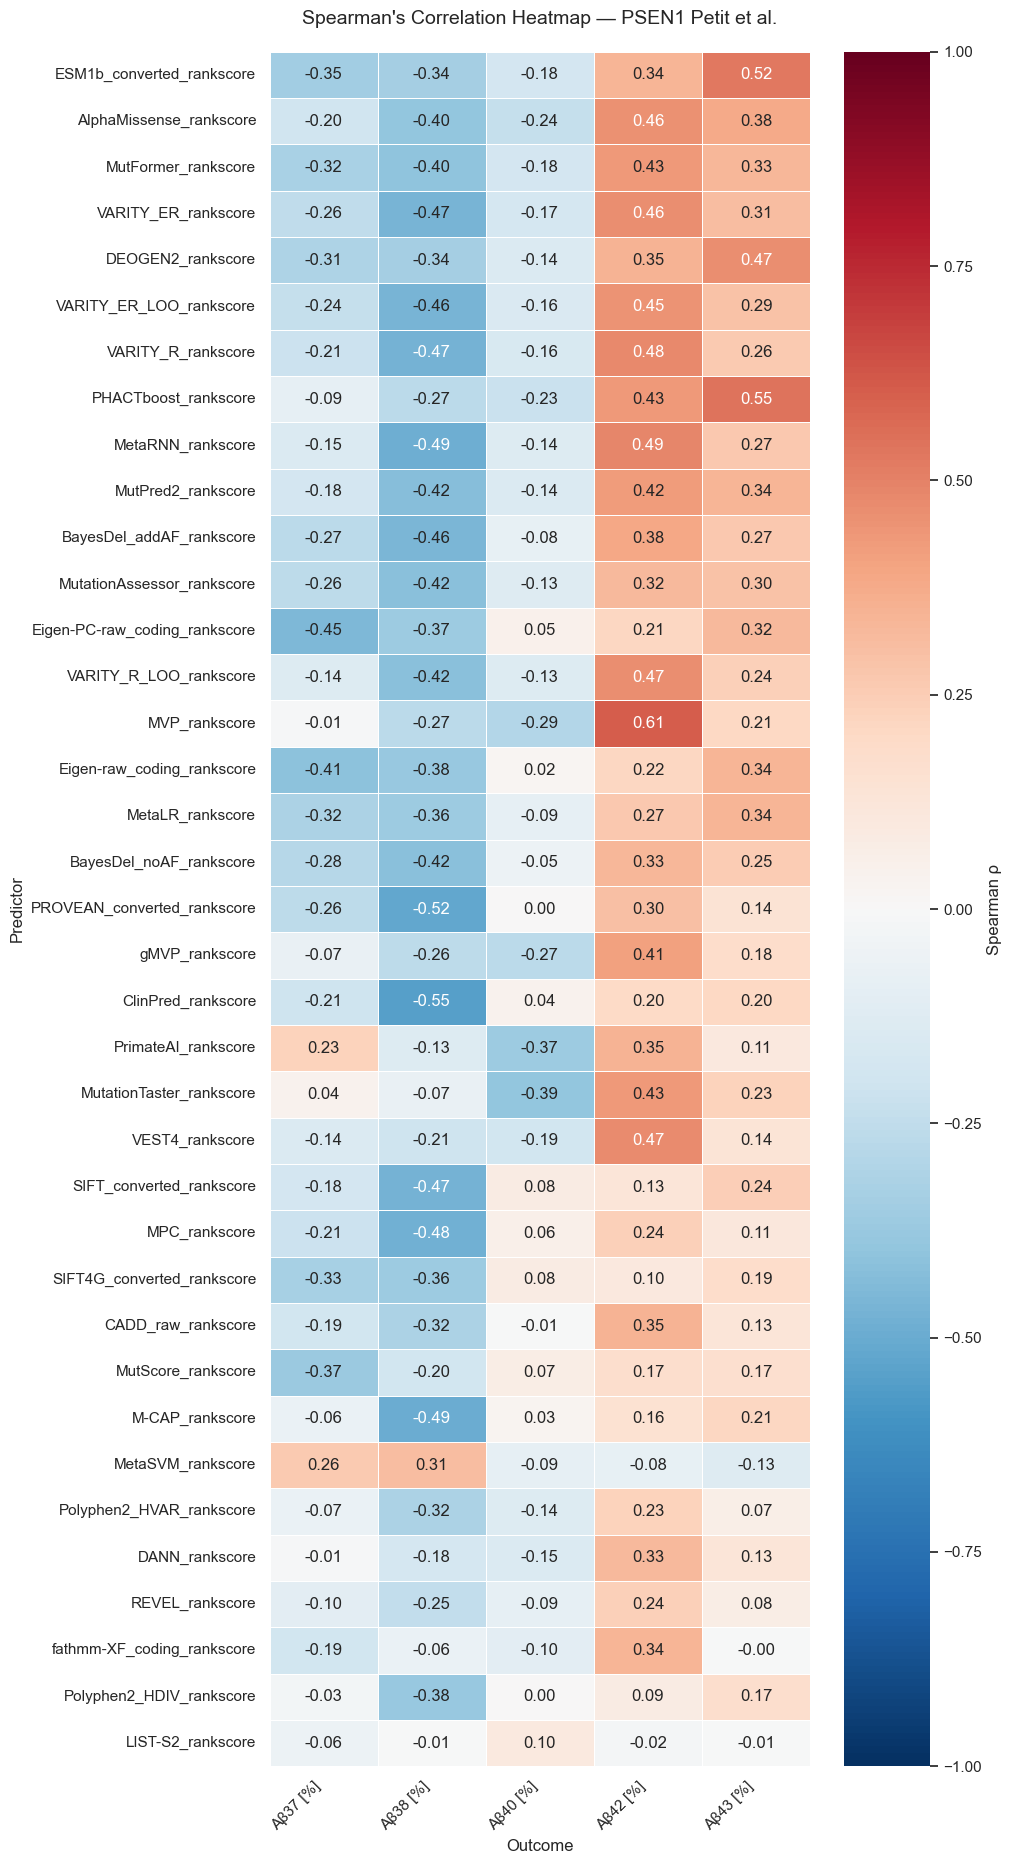

In [188]:
# --- 🔟 Plot Heatmap ---
sns.set(style="white", font_scale=1.0)
fig, ax = plt.subplots(figsize=(10, 0.4 * len(predictors) + 4))

sns.heatmap(
    rho_matrix,
    cmap="RdBu_r",
    vmin=-1, vmax=1,
    annot=True, fmt=".2f",
    linewidths=0.5,
    cbar_kws={"label": "Spearman ρ"},
    ax=ax
)

ax.set_title(HEATMAP_TITLE, fontsize=14, pad=20)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()

In [189]:
# --- 1️⃣1️⃣ Save Heatmap ---
output_fig = f"figures/{OUTPUT_PREFIX}_heatmap.png"
fig.savefig(output_fig, dpi=600, bbox_inches="tight", facecolor="white")
print(f"Saved heatmap → {output_fig}")

Saved heatmap → figures/PSEN1_Petit_heatmap.png
